# Lab 4: Transform coding

This lab aims to get familiar with transform coding methods based on the DFT and DCT transforms.

## Reference concepts

### Transform coding
It refers to the techniques used in signal compression that convert a signal from its original domain (such as the time domain or spatial domain) into a different domain, typically the frequency domain, where the signal can be represented more efficiently. The goal of transform coding is to reduce the amount of data required to represent the signal by taking advantage of redundancies or perceptual irrelevancies.

### Discrete Fourier Transform (DFT)
The DFT is the basic frequency-domain transformation, conceptually easy to understand, and suitable for most kind of spectral analysis and spectral transformations. However, the STFT, built on top of the DFT, requires overlapping between windows, but it doubles the information that need to be stored: not very good for compression.

### Discrete Cosine Transform (DCT)
The DCT is a transform similar to the DFT but using only real numbers. It expresses a finite sequence of data points in terms of a sum of cosine functions oscillating at different frequencies. The DCT is widely used in applications such as audio, image, and video compression due to its ability to concentrate energy in a small number of coefficients.

### Modified Discrete Cosine Transform (MDCT)
The MDCT is an extension of the DCT, designed specifically for audio compression algorithms such as MP3 or AAC. The MDCT helps to reduce blocking artifacts and efficiently compress overlapping blocks of data, which is particularly important for perceptual audio coding.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, dct, idct
from scipy.io.wavfile import read
import IPython.display as ipd

In [ ]:
# functions used in the whole lab
def read_sound(file):
  """ read a mono wav sound file, assuming is mono, and convert it to a floating point array
    Args:
      file (str): File name
    Returns:
      sound_array (numpy.array): Array of samples as floating point values between -1 and 1
      sampling_rate (int): Sampling rate
  """
  # read sound file
  sampling_rate, x = read(file)
  # convert to floating point values between -1 and 1, assuming x are 16 bit integers
  sound_array = np.float32(x) / 2**15
  return sound_array, sampling_rate

def display_sound(sound_array, sampling_rate=44100):
  """ Display signal sound_array
    Args:
      sound_array (numpy.array): Array of samples
      sampling_rate (int): Sampling rate
  """
  # plot the waveform of the sound
  plt.figure(0, figsize=(10, 2))
  time_indexes = np.arange(0, sound_array.size/sampling_rate, 1.0/sampling_rate)
  plt.plot(time_indexes, sound_array)
  plt.xlabel('time (seconds)')
  plt.ylabel('amplitude')
  plt.show()
  # play the sound
  ipd.display(ipd.Audio(data=sound_array, rate=sampling_rate))

## Part 1 - DFT, DCT

Compare the DFT with the DCT. Answer the questions given while modifying the code as needed to support the answers.

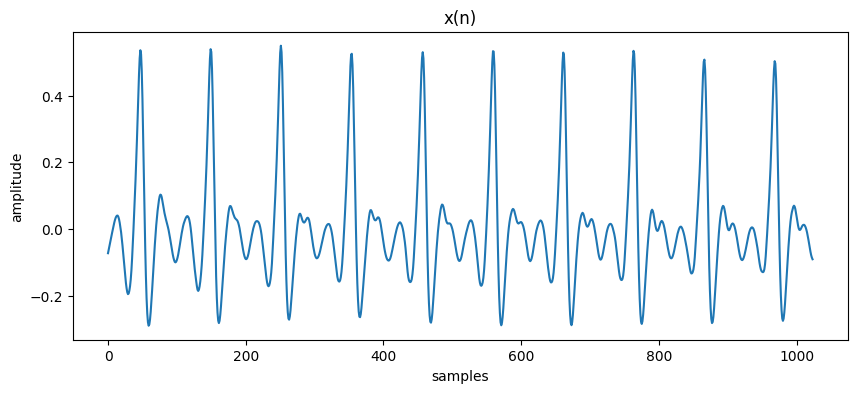

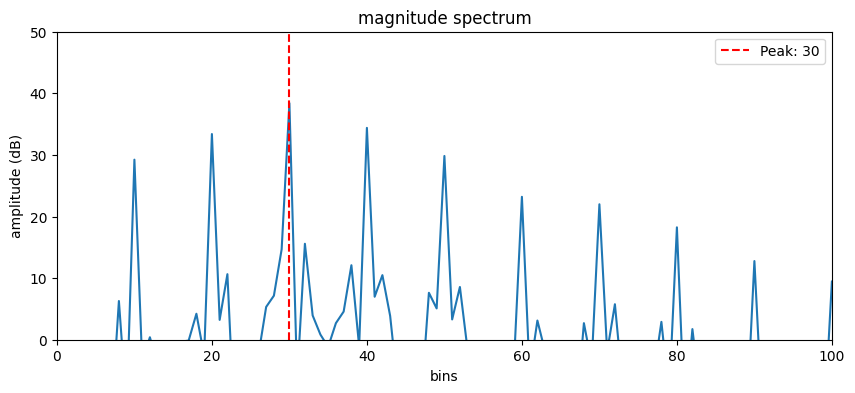

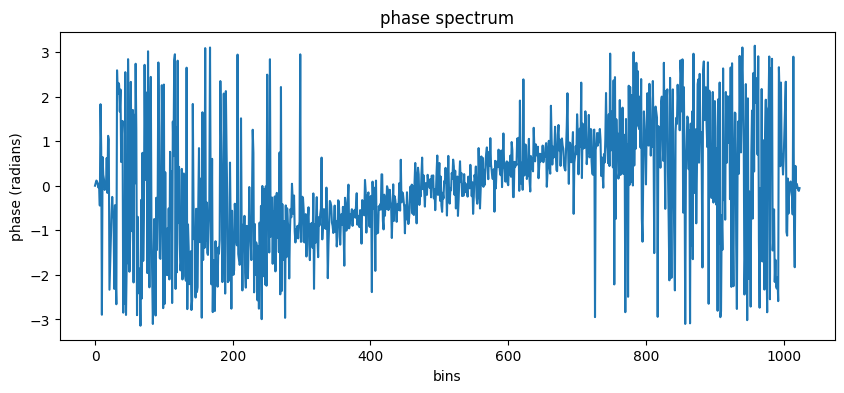

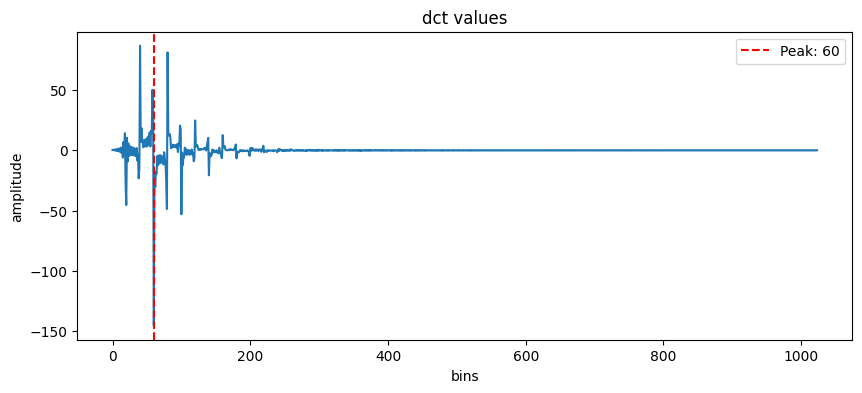

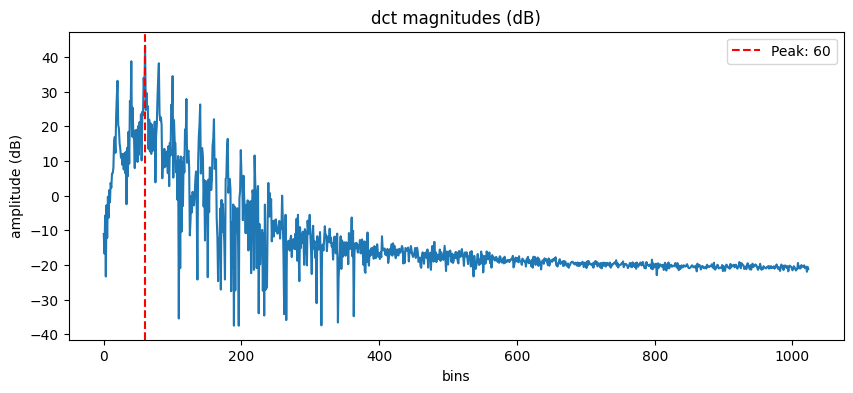

Peak location in DFT: 30
Peak location in DCT: 60


In [ ]:
# perform dft and dct of a sinewave and complex sound

# x, fs = read_sound('/content/drive/MyDrive/UNI/UPF/5è CURS/1r TRIM/SISTEMES DE CODIFICACIÓ ÀUDIO I VÍDEO/audio-coding-materials-main/sounds/sinewave.wav')
x, fs = read_sound('/content/drive/MyDrive/UNI/UPF/5è CURS/1r TRIM/SISTEMES DE CODIFICACIÓ ÀUDIO I VÍDEO/audio-coding-materials-main/sounds/487465-trumpet.wav')
N = 1024
xf = x[2000:2000+N]

plt.figure(1, figsize=(10, 4))
plt.plot(xf)
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.title('x(n)')
plt.show()

# DFT
X_dft = fft(xf)
magnitude_dft = 20 * np.log10(np.abs(X_dft))
peak_dft = np.argmax(magnitude_dft)  # peak DFT

plt.figure(1, figsize=(10, 4))
plt.plot(magnitude_dft)
plt.xlabel('bins')
plt.ylabel('amplitude (dB)')
plt.title('magnitude spectrum')
plt.axis([0, 100, 0, 50])
plt.axvline(x=peak_dft, color='r', linestyle='--', label=f'Peak: {peak_dft}')
plt.legend()
plt.show()

plt.figure(1, figsize=(10, 4))
plt.plot(np.angle(X_dft))
plt.xlabel('bins')
plt.ylabel('phase (radians)')
plt.title('phase spectrum')
plt.show()

# DCT
X_dct = dct(xf, type=4)
magnitude_dct = 20 * np.log10(np.abs(X_dct))
peak_dct = np.argmax(magnitude_dct)  # peak DCT

plt.figure(0, figsize=(10, 4))
plt.plot(X_dct)
plt.xlabel('bins')
plt.ylabel('amplitude')
plt.title('dct values')
plt.axvline(x=peak_dct, color='r', linestyle='--', label=f'Peak: {peak_dct}')
plt.legend()
plt.show()

plt.figure(0, figsize=(10, 4))
plt.plot(magnitude_dct)
plt.xlabel('bins')
plt.ylabel('amplitude (dB)')
plt.title('dct magnitudes (dB)')
plt.axvline(x=peak_dct, color='r', linestyle='--', label=f'Peak: {peak_dct}')
plt.legend()
plt.show()

print(f"Peak location in DFT: {peak_dft}")
print(f"Peak location in DCT: {peak_dct}")


**Questions:**

1. **Compute the DFT and the DCT of a sinewave and describe the similarities and differences of the outputs obtained. Find the location of the peak in the magnitudes of both spectra. What is the difference.**

  Tant la DFT com la DCT representen el senyal en el domini de freqüència i mostren un pic a la freqüència fonamental del senyal sinusoidal. La DFT mostra simetria perquè inclou freqüències positives i negatives, mentre que la DCT concentra l'espectre al principi, ja que només considera components cosinus. A més, les magnituds varien a causa de les diferents funcions base utilitzades (exponencials complexes en la DFT i cosinus en la DCT).
  
  Veiem que a la magnitud de l'espectre de la DFT, el pic més alt es troba a 10 samples, mentres que a la DCT es troba a 19 bins, ja que la DFT considera tant freqüències positives com negatives, mentres que la DCT es concentra en freqüències positives, resultant en una distribució diferent de l'energia. Això indica que cada transformada té característiques diferents en la representació de la freqüència de la senyal analitzada.

2. **Compute the DFT and DCT of a complex sound (one of the sounds in the sounds directory), and compare and describe their spectrum.**

  La forma de l'espectre de la DFT presenta peaks o formes de manera periòdica, en canvi, l'espectre de la DCT es troba més concentrat al principi, indicant que la major part de l'energia es troba en unes quantes freqüències clau. A l'espectre de la DFT, veiem el pic més alt a 30 samples, i que mostra un espectre de freqüències més ampli i reflecteix la diversitat de sons de la trompeta. En canvi, a la DCT el pic més alt es troba a 60 bins, indicant que concentra més energia en menys freqüències. Això fa que la DCT sigui millor per ressaltar les característiques més importants del so de la trompeta. En comparació, la DFT proporciona una imatge més completa del so, mentres que la DCT dona una representació més simple i eficient.

## Part 2 - STFT, MCDT

Compute and compare a coding/decoding system using both the STFT and the MDCT. Answer the questions given while modifying the code as needed to support the answers.

In [ ]:
# functions needed to compute mdct

N = 1024

#The D(z) matrix:
def Dmatrix(samples):
    #implementation of the delay matrix D(z)
    N = len(samples)
    out=np.zeros(N)
    out[0:int(N/2)]=Dmatrix.z
    Dmatrix.z=samples[0:int(N/2)]
    out[int(N/2):N]=samples[int(N/2):N]
    return out

Dmatrix.z=np.zeros(N//2)

#The inverse D(z) matrix:
def Dmatrixinv(samples):
    #implementation of the delay matrix D(z)
    N = len(samples)
    out=np.zeros(N)
    out[int(N/2):N]=Dmatrixinv.z
    Dmatrixinv.z=samples[int(N/2):N]
    out[0:int(N/2)]=samples[0:int(N/2)]
    return out

Dmatrixinv.z=np.zeros(int(N/2))

#The F Matrix:
fcoeff=np.sin(np.pi/(2*N)*(np.arange(0,2*N)+0.5))
Fmatrix=np.zeros((N,N))
Fmatrix[0:int(N/2),0:int(N/2)]=np.fliplr(np.diag(fcoeff[0:int(N/2)]))
Fmatrix[int(N/2):N,0:int(N/2)]=np.diag(fcoeff[int(N/2):N])
Fmatrix[0:int(N/2),int(N/2):N]=np.diag(fcoeff[N:int(N+N/2)])
Fmatrix[int(N/2):N,int(N/2):N]=-np.fliplr(np.diag(fcoeff[int(N+N/2):(2*N)]))

#The inverse F matrix:
Finv=np.linalg.inv(Fmatrix)

#The complete MDCT, Analysis:
def MDCT(samples):
    y=np.dot(samples,Fmatrix)
    y=Dmatrix(y)
    y=dct(y,type=4)
    return y

#The inverse MDCT, synthesis:
def MDCTinv(y):
    #inverse DCT4 is identical to DCT4:
    x=idct(y,type=4)/(2*len(y))
    #inverse D(z) matrix
    x=Dmatrixinv(x)
    #inverse F matrix
    x=np.dot(x,Finv)
    return x

def display_spectrogram_mcdt(x, N, fs=44100):
  i = 0
  Xf = []
  while i < x.size-N:
    X = MDCT(x[i:i+N])
    Xf.append(np.array(X))
    i += N

  Xf = np.array(Xf)
  plt.figure(figsize=(10, 5))
  plt.pcolormesh(np.transpose(20*np.log10(np.abs(Xf))), shading='nearest', cmap='inferno')
  plt.colorbar(format='%+2.0f dB')
  plt.xlabel('frames')
  plt.ylabel('bins')
  plt.show()

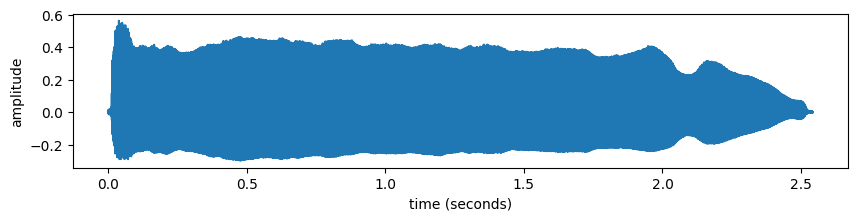

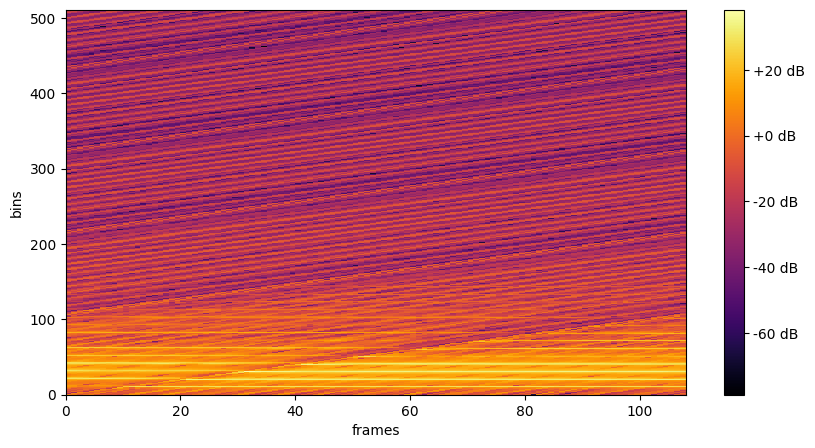

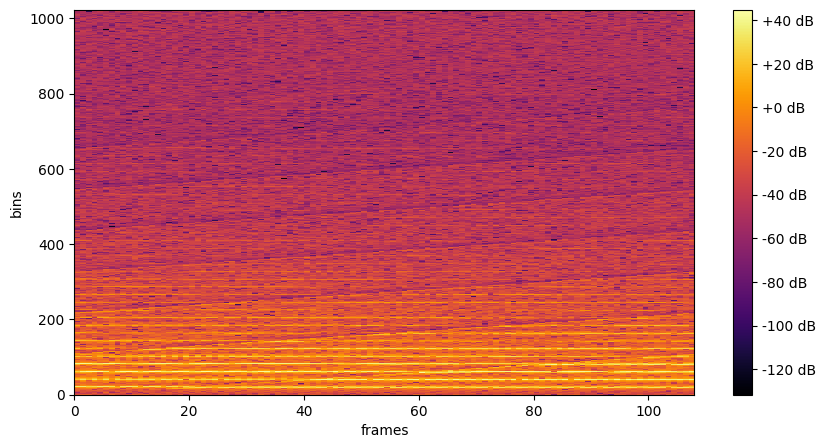

In [ ]:
# compute the spectrogram of a sound using both the STFT and the MDCT

def display_spectrogram_stft(sound_array, fft_size=512, sampling_rate=44100):
  # initialize the output spectrogram
  magnitude_spectrogram = []
  sample_index = 0
  # iterate over the input sound computing a sequence of spectra
  while sample_index < sound_array.size-fft_size:
    spectrum = fft(sound_array[sample_index:sample_index+fft_size])
    magnitude_spectrum = 20*np.log10(abs(spectrum[:spectrum.size//2]))
    magnitude_spectrogram.append(magnitude_spectrum)
    sample_index += fft_size

  # plot the magnitude sspectrogram
  plt.figure(figsize=(10, 5))
  plt.pcolormesh(np.transpose(magnitude_spectrogram), shading='nearest', cmap='inferno')
  plt.colorbar(format='%+2.0f dB')
  plt.xlabel('frames')
  plt.ylabel('bins')
  plt.show()

x, fs = read_sound('/content/drive/MyDrive/UNI/UPF/5è CURS/1r TRIM/SISTEMES DE CODIFICACIÓ ÀUDIO I VÍDEO/audio-coding-materials-main/sounds/487465-trumpet.wav')
display_sound(x, fs)

display_spectrogram_stft(x, N, 1)

display_spectrogram_mcdt(x, N, fs)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Perform MCDT (analysis) and inverse MCDT (synthesis)
def compute_mcdt(x, N, fs=44100):
    i = 0
    Xf = []
    while i < x.size - N:
        X = MDCT(x[i:i + N])
        Xf.append(np.array(X))
        i += N
    return np.array(Xf)

def compute_inverse_mcdt(Xf, fs=44100):
    y = np.zeros(len(Xf) * len(Xf[0]))
    for i in range(len(Xf)):
        yt = MDCTinv(Xf[i, :])
        y[i * len(Xf[0]): i * len(Xf[0]) + len(yt)] = yt
    return y

# Perform STFT (analysis) and inverse STFT (synthesis)
def compute_stft(sound_array, fft_size=512):
    magnitude_spectrogram = []
    sample_index = 0
    while sample_index < sound_array.size - fft_size:
        spectrum = fft(sound_array[sample_index:sample_index + fft_size])
        magnitude_spectrum = np.abs(spectrum[:fft_size // 2])  # Usar la mitad del espectro
        magnitude_spectrogram.append(magnitude_spectrum)
        sample_index += fft_size // 2  # Desplazamiento por la mitad para solapamiento
    return np.array(magnitude_spectrogram)

def compute_inverse_stft(magnitude_spectrogram, fft_size=512):
    y = np.zeros(magnitude_spectrogram.shape[0] * fft_size)
    for i in range(magnitude_spectrogram.shape[0]):
        # Crear fase aleatoria o cero
        phase = np.zeros(fft_size // 2)
        spectrum = magnitude_spectrogram[i, :] * np.exp(1j * phase)
        reconstructed = ifft(spectrum, n=fft_size).real
        y[i * fft_size:(i + 1) * fft_size] += reconstructed
    return y


# 1st sound
x1, fs1 = read_sound('/content/drive/MyDrive/UNI/UPF/5è CURS/1r TRIM/SISTEMES DE CODIFICACIÓ ÀUDIO I VÍDEO/audio-coding-materials-main/sounds/487465-trumpet.wav')
display_sound(x1, fs1)

Xf1 = compute_mcdt(x1, N, fs1)
y1 = compute_inverse_mcdt(Xf1, fs1)
display_sound(y1, fs1)

Xf1_stft = compute_stft(x1, N)
y1_stft = compute_inverse_stft(Xf1_stft, N)
display_sound(y1_stft, fs1)

# 2nd sound
x2, fs2 = read_sound('/content/drive/MyDrive/UNI/UPF/5è CURS/1r TRIM/SISTEMES DE CODIFICACIÓ ÀUDIO I VÍDEO/audio-coding-materials-main/sounds/406609-tuba.wav')
display_sound(x2, fs2)

Xf2 = compute_mcdt(x2, N, fs2)
y2 = compute_inverse_mcdt(Xf2, fs2)
display_sound(y2, fs2)

Xf2_stft = compute_stft(x2, N)
y2_stft = compute_inverse_stft(Xf2_stft, N)
display_sound(y2_stft, fs2)


Output hidden; open in https://colab.research.google.com to view.

**Questions:**
1. **Compare the STFT (without window overlapping and using rectangular window) with the MCDT. Perform the analysis/synthesis of 2 distinct sounds using both the STFT and MCDT and compare the results.**

  Tant la STFT com la MCDT analitzen el contingut espectral d'una senyal al llarg del temps. La STFT utilitza una finestra fixa, la qual cosa pot provocar artefactes visibles com línies diagonals marcades en el seu espectrograma, degut a les discontinuïtats en els límits de la finestra. En canvi, la MCDT permet variacions en la longitud de la finestra, produint un espectrograma més suau i continu que captura millor les transicions ràpides de la senyal. Això es deu a la seva capacitat d'adaptar la resolució temporal i frecuencial a les característiques de la senyal.

  Al fer l'anàlisi i síntesi de dons sons, una trompeta i una tuba, hem vist que la reconstrucció amb MDCT ha mantingut la mateixa forma d'ona i qualitat original del so, sonant igual que l'original. En canvi, la síntesi a partir de la STFT ha donat lloc a un so amb distorsions notables que afectaven la seva qualitat, i la forma d'ona era molt diferent a la original.

2. **Do you obtain an identity system in both? explain.**

   Amb la MDCT hem obtingut un sistema d'identitat, ja que hem pogut reconstruir amb precisió el senyal original. D'altra banda, la STFT té el potencial de ser un sistema d'identitat, però factors com la finestra utilitzada i l'overlap poden provocar artefactes. Això ha fet que el so reconstruït amb STFT soni distorsionat, impedint que funcioni com un sistema d'identitat en la pràctica.




# Part 3 - Quantizing the MCDT spectrogram

Quantize the MCDT encoded data. Answer the questions given while modifying the code as needed to support the answers.

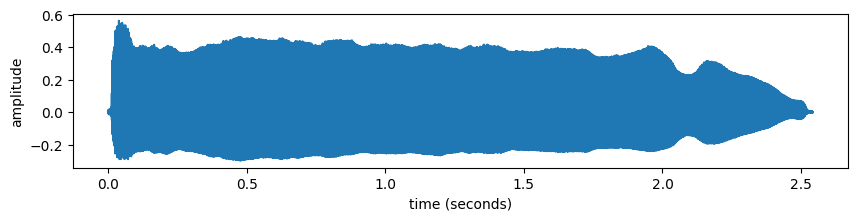

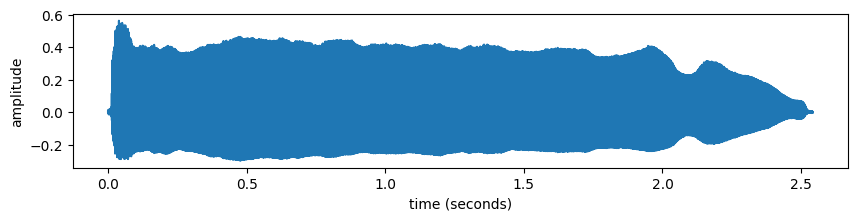

Reconstruction MSE: 0.000000


In [ ]:
def quantize_subbands(Xf, target_bits=16):
    """Quantize each subband of the MDCT output to an integer of given number of bits."""

    X_quantized = np.zeros_like(Xf)
    for i in range(len(Xf[0,:])):
      # Scaling the signal to the range of [0, 2^target_bits - 1]
      scaled = (Xf[:,i] - np.min(Xf[:,i])) / (np.max(Xf[:,i]) - np.min(Xf[:,i])) * (2**target_bits - 1)
      # Quantize by rounding
      quantized = np.round(scaled)
      # Re-scaling back to the original amplitude range
      X_quantized[:,i] = (quantized / (2**target_bits - 1)) * (np.max(Xf[:,i]) - np.min(Xf[:,i])) + np.min(Xf[:,i])
    return X_quantized

def quantize_signal(x, target_bits):
  # Scaling the signal to the range of [0, 2^target_bits - 1]
  x_scaled = (x - np.min(x)) / (np.max(x) - np.min(x)) * (2**target_bits - 1)
  # Quantize by rounding
  x_quantized = np.round(x_scaled)
  # Re-scaling back to the original amplitude range
  x_output = (x_quantized / (2**target_bits - 1)) * (np.max(x) - np.min(x)) + np.min(x)
  return x_output


Xf = compute_mcdt(x, N, fs)

# Quantize the MDCT coefficients one band at a time
#quantized_Xf = quantize_subbands(Xf, 4)

# Quantize the MDCT coefficients all together
#quantized_Xf = quantize_signal(Xf, 12)

# Reconstruct the time-domain signal from the MDCT coefficients
#x_reconstructed = compute_inverse_mcdt(quantized_Xf, N)

# Quantize the original signal
x_reconstructed = quantize_signal(x, 9)

# Plot the original and reconstructed signals
display_sound(x, fs)
display_sound(x_reconstructed, fs)


# Evaluate the Reconstruction Quality
mse = np.mean((x[:len(x_reconstructed)] - x_reconstructed)**2)
print(f"Reconstruction MSE: {mse:.6f}")

**Questions:**

1. **Quantize the MDCT output (floting point values) one band at a time, to integer values of different number of bits. Find the lowest number of bits for which you do not hear a difference. Explain the result. (Note: In the code given the quantized data is not stored as integer values, but you can evaluate the results as if it was)**

  El nombre mes petit de bits per al qual no s'escoltava diferència amb l'original és 4. Això vol dir que quantitzem els coeficients de la MDCT a 4 bits per banda, i que aquests 4 bits proporcionen prou resolució per capturar la informació essencial del so en cada subbanda, mantenint la qualitat del so. Això es deu a que l'oïda humana és menys sensible a petites pèrdues de precisió en la quantització, especialment en freqüències on la percepció és menys crítica, cosa que permet reduir la quantitat de bits sense reduir la qualitat auditiva.

2. **Compare the quantization done one band at a time, with the quantization done for the whole MDCT output, with the one done on the original signal. Explain the result.**

  A la quantització feta per el MDCT output sencer, necesitem minim 12 bits per no escoltar cap diferència ni distorsió del so, i a la quantització de la senyal original en necessitem mínim 9 bits.
  
  Això es deu a quan es quantitza tot el resultat de la MDCT de cop, no es poden aprofitar les diferències en com l'oïda percep les diferents freqüències, i per això calen més bits per mantenir la qualitat del so. En canvi, quantitzar per subbandes permet ajustar millor la precisió per a cada grup de freqüències, reduint la necessitat de tants bits. Quan es quantitza el senyal original, s'estan tractant les mostres de temps directament, i això fa que es pugui preservar la qualitat amb menys bits que en quantitzar tot el resultat de la MDCT junt.

3. **What is the best coding bit-rate obtained compared with the original signal. Explain the result.**

  El millor bit-rate aconseguit és quan es quantitza el senyal MDCT per subbandes amb 4 bits per banda. En comparació amb el senyal original, aquesta quantització redueix el bit-rate en un 75% (passant de 16 bits a 4 bits), mantenint una qualitat de so similar. Això és possible perquè la transformada MDCT comprimeix la informació al domini de la freqüència, permetent així una codificació més eficient sense una pèrdua de qualitat significativa.
